In [4]:
library("tidyverse")
library("ggplot2")
library('magrittr')
library('ggpubr')
library("dplyr")
#library("dlookr")
library("psych") # describe function
library("purrr") # keep function

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract


Attaching package: ‘psych’

The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



In [70]:
# laod data
data <- read.table(pipe("pbpaste"), sep = "\t", header= T)

In [71]:
data1 <- data

In [72]:
describe(data1)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Users*,1,187,94.000000,54.1263953,94.00,94.000000,69.68220,1.00,187.00,186.00,0.00000000,-1.21926776,3.95811403
Product*,2,187,2.069519,0.7900465,2.00,2.086093,1.48260,1.00,3.00,2.00,-0.12227369,-1.39727507,0.05777392
frequent_use,3,187,3.770053,0.9364549,4.00,3.860927,0.00000,1.00,5.00,4.00,-0.82181571,0.45349914,0.06848037
complex,4,187,-1.614973,0.9224735,-1.00,-1.456954,0.00000,-5.00,0.00,5.00,-1.56341665,2.57230395,0.06745794
easy_to_use,5,186,4.473118,5.2496412,4.00,3.860000,0.00000,1.00,55.00,54.00,7.94031064,65.11079938,0.38492237
need_help,6,187,-1.572193,0.8668798,-1.00,-1.417219,0.00000,-5.00,0.00,5.00,-1.52711008,2.19483125,0.06339253
well.integrated,7,186,3.763441,3.1154293,3.00,3.553333,0.00000,0.00,44.00,44.00,11.55290970,146.63045388,0.22843436
inconsistent,8,187,-1.946524,3.2224559,-1.00,-1.635762,0.00000,-44.00,0.00,44.00,-11.89062757,152.12270387,0.23564931
learnable,9,186,4.075269,0.9327270,4.00,4.186667,1.48260,1.00,6.00,5.00,-0.94362738,0.97368577,0.06839086
cumbersome,10,187,-1.443850,0.6564831,-1.00,-1.364238,0.00000,-5.00,0.00,5.00,-1.39700263,3.67299383,0.04800680


In [6]:
str(data1)

'data.frame':	260 obs. of  20 variables:
 $ Users                : Factor w/ 260 levels "u1","u10","u100",..: 237 84 187 50 231 238 226 135 15 235 ...
 $ Product              : Factor w/ 3 levels "Advocate","Beyond",..: 1 2 3 2 1 1 1 3 1 1 ...
 $ frequent_use         : int  2 3 5 2 3 2 3 3 2 2 ...
 $ complex              : int  -2 -1 -2 -2 -1 -1 -3 -3 -2 -2 ...
 $ easy_to_use          : int  4 NA NA 0 3 3 3 4 3 4 ...
 $ need_help            : int  -2 0 -2 -2 -2 -3 -1 -2 -4 -1 ...
 $ well.integrated      : int  3 NA NA 3 4 4 4 3 3 3 ...
 $ inconsistent         : int  -44 0 -2 -2 -5 -3 -3 -3 -2 -2 ...
 $ learnable            : int  1 NA NA 3 3 1 3 4 5 4 ...
 $ cumbersome           : int  -2 0 0 -2 -3 -1 -3 -3 -2 -1 ...
 $ confident            : int  3 NA NA 3 3 2 3 4 3 4 ...
 $ need_knowledge       : int  -2 -3 0 -2 -2 -1 -2 -3 -2 -7 ...
 $ total_score          : int  -39 -1 -1 1 3 3 4 4 4 4 ...
 $ signUp               : num  212 242 124 323 231 121 212 123 145 201 ...
 $ signIn         

In [59]:
# we use keep to select particular part of data that we want 
data1 %>% keep(is.numeric) %>% head() 

frequent_use,complex,easy_to_use,need_help,well.integrated,inconsistent,learnable,cumbersome,confident,need_knowledge,total_score,signUp,signIn,firstClick,wizard_time,connectToDoctors,findMyExercise,appointmentScheduling
3,-1,4,-1,3,-1,4,-1,4,-7,7,100.05,44.00,18.65,31.00,90.00,89.25,43.00
3,-1,4,-1,3,-1,4,-1,4,-1,13,105.00,80.00,15.00,42.00,101.00,42.80,95.00
5,-2,5,-2,5,-3,5,-2,4,-2,13,121.92,76.96,7.92,42.20,89.00,58.00,110.00
3,-3,3,-1,4,-3,3,-3,3,-2,4,179.00,72.32,30.00,43.00,98.00,104.00,134.00
4,-1,3,-4,3,-3,3,-1,3,-1,6,124.00,79.04,10.00,44.28,107.40,79.20,109.00
4,-1,5,-3,4,-3,5,-1,4,-1,13,56.00,113.00,13.84,45.00,86.92,79.12,70.72


# checking normality of data

Density plot and Q-Q plot can be used to check normality visually.

1- Density plot: the density plot provides a visual judgment about whether the distribution is bell shaped.


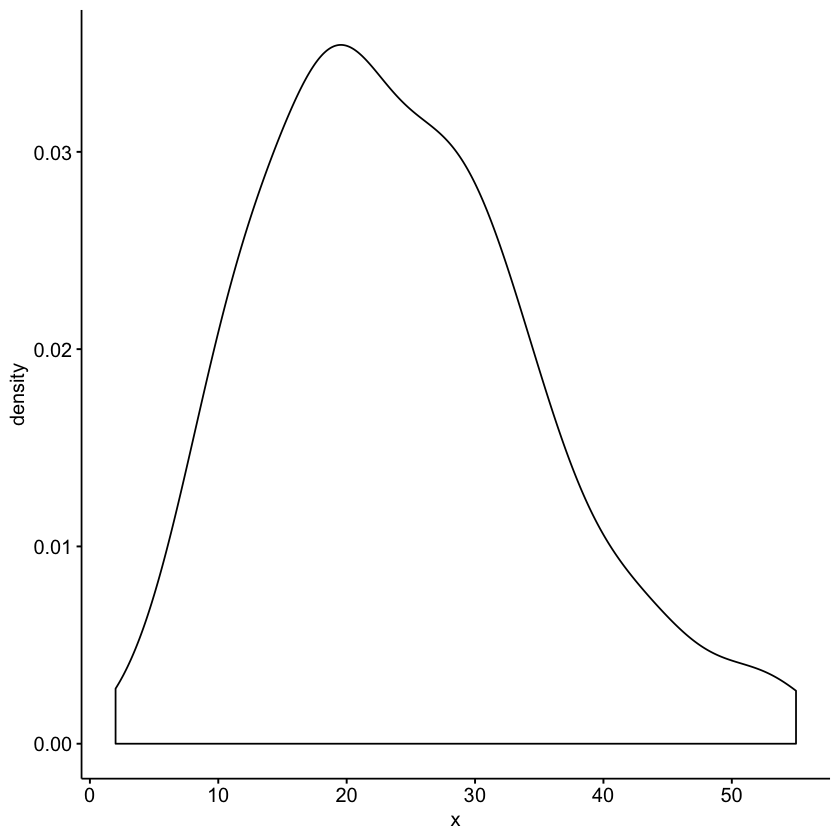

In [73]:
ggdensity(data1$firstClick)

2- Q-Q plot: Q-Q plot (or quantile-quantile plot) draws the correlation between a given sample and the normal distribution. A 45-degree reference line is also plotted.


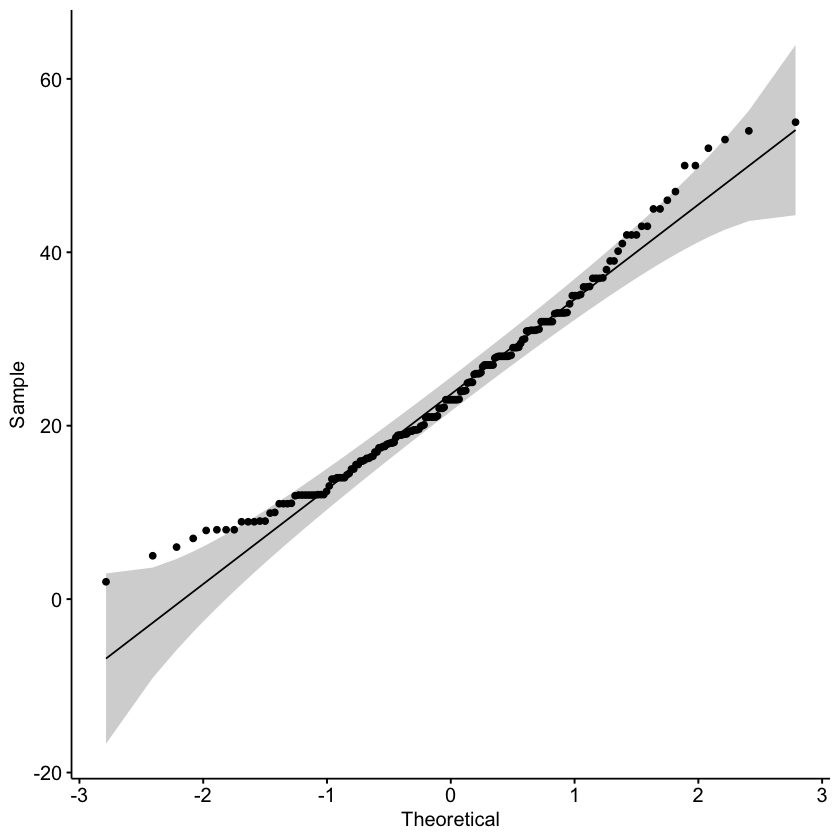

In [75]:
ggqqplot(data1$firstClick)

 Visual inspection, described in the previous section, is usually unreliable. It’s possible to use a significance test comparing the sample distribution to a normal one in order to ascertain whether data show or not a serious deviation from normality.
 
 There are several methods for normality test such as # Kolmogorov-Smirnov (K-S) normality test and # Shapiro-Wilk’s test.


Shapiro-Wilk’s method is widely recommended for normality test and it provides better power than K-S. It is based on the correlation between the data and the corresponding normal scores.


In [74]:
shapiro.test(data1$firstClick)


	Shapiro-Wilk normality test

data:  data1$firstClick
W = 0.97253, p-value = 0.0009652


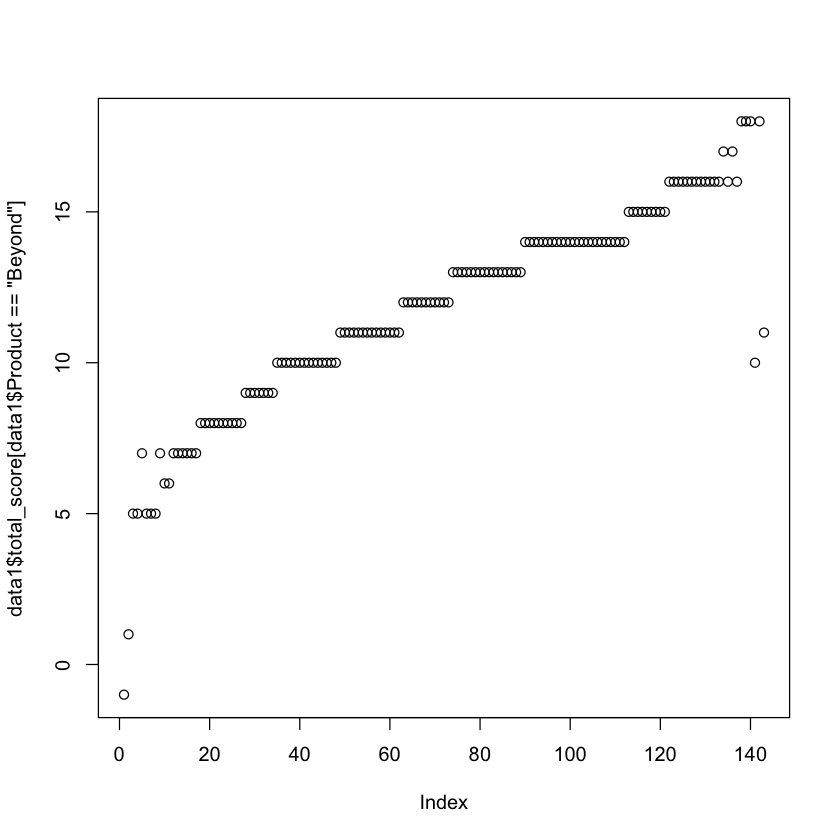

In [30]:
plot(data1$total_score[data1$Product== "Beyond"])

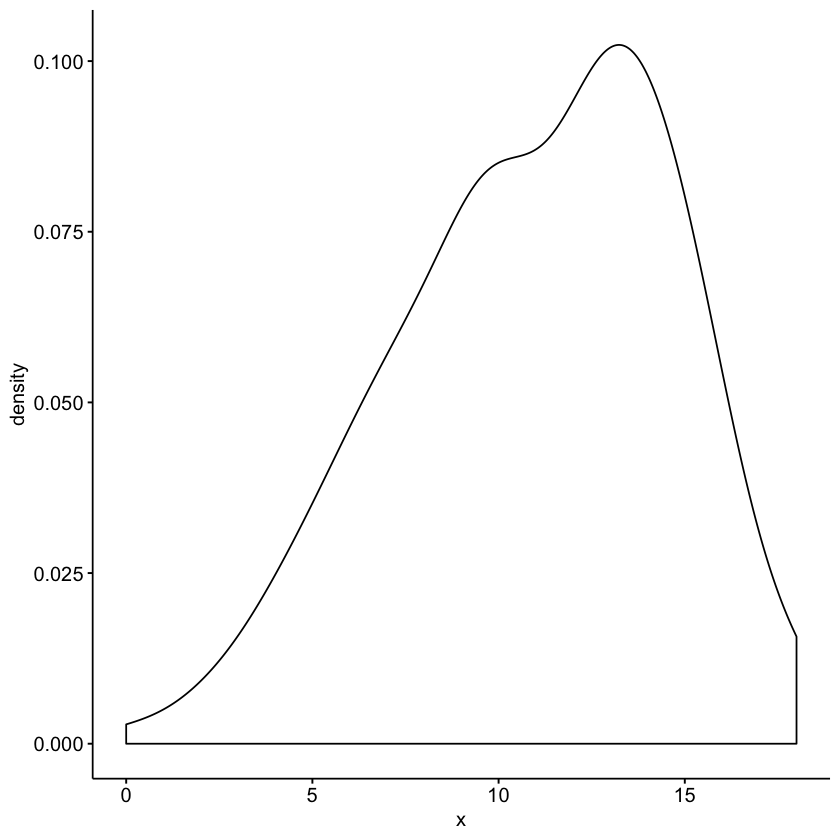

In [46]:
ggdensity(data1$total_score)

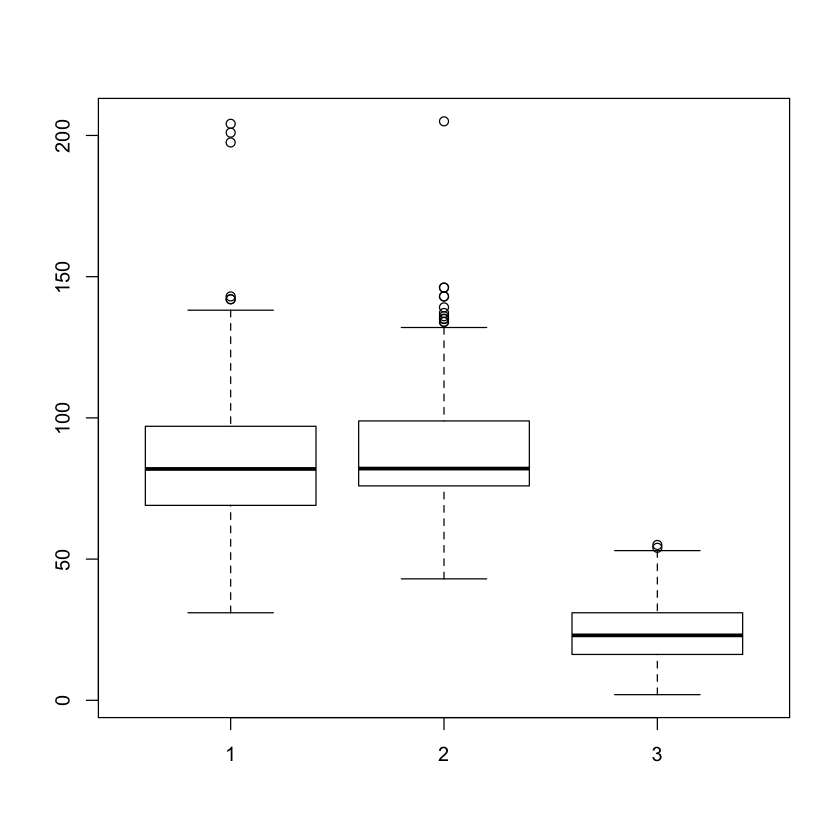

In [78]:
boxplot(data1$wizard_time, data1$signIn, data1$firstClick)

In [32]:
shapiro.test(data1$total_score)


	Shapiro-Wilk normality test

data:  data1$total_score
W = 0.97243, p-value = 6.341e-05


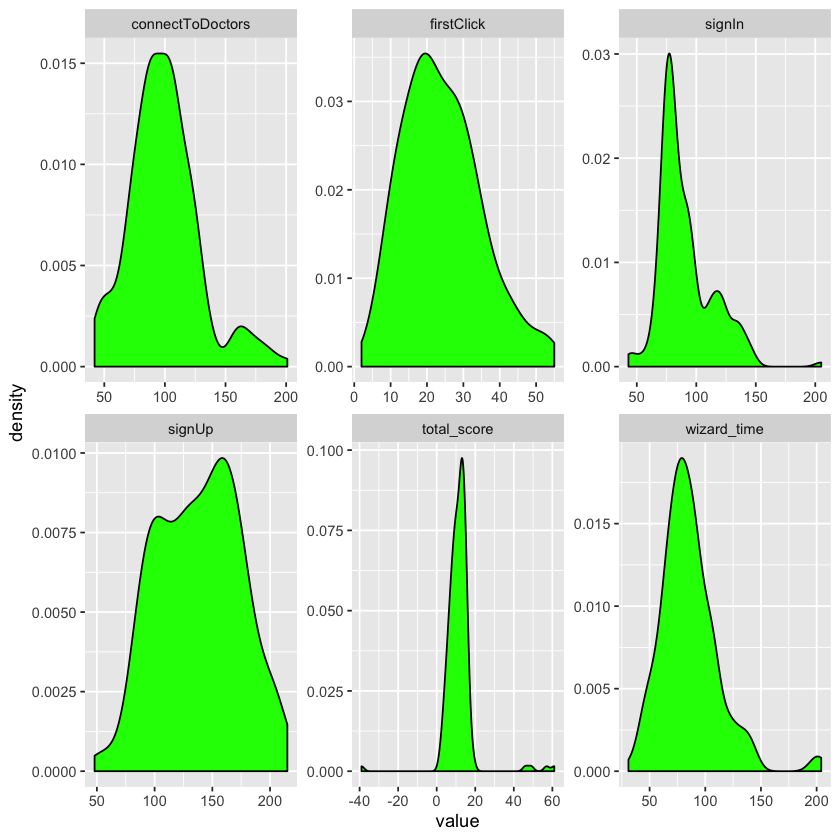

In [77]:
# gather for convering sevearl cols inot two cols (key or name of col and value)
data1[,13:18]%>% keep(is.numeric) %>% gather() %>% ggplot(aes(value)) + facet_wrap(~ key, scales = "free") + geom_density(fill="green")


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


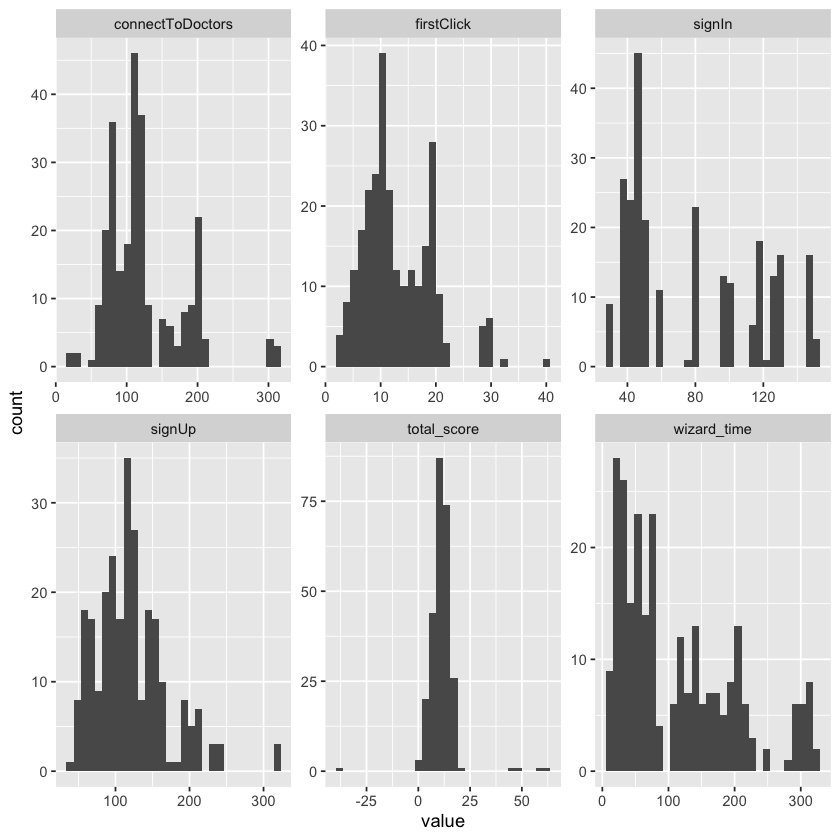

In [99]:
data1[,13:18]%>% keep(is.numeric) %>% gather() %>% ggplot(aes(value)) + facet_wrap(~ key, scales = "free") + geom_histogram()

In [100]:
# now let handle some errornous data

describe(data1)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Users*,1,260,130.500000,75.1997340,130.50,130.500000,96.369000,1.00,260,259.00,0.00000000,-1.21385476,4.66368953
Product*,2,260,2.050000,0.6702446,2.00,2.062500,0.000000,1.00,3,2.00,-0.05729136,-0.78632894,0.04156680
frequent_use,3,260,3.761538,0.9730249,4.00,3.860577,1.482600,1.00,5,4.00,-0.81433516,0.35297515,0.06034445
complex,4,260,-1.569231,0.7999851,-1.00,-1.456731,0.000000,-4.00,0,4.00,-0.96901376,0.29386727,0.04961297
easy_to_use,5,255,4.290196,4.5170393,4.00,3.878049,0.000000,0.00,55,55.00,9.20106541,89.12403892,0.28286797
need_help,6,260,-1.503846,0.7835080,-1.00,-1.370192,0.000000,-4.00,0,4.00,-1.21078340,1.00997872,0.04859110
well.integrated,7,256,3.675781,2.7037301,3.00,3.524272,0.000000,0.00,44,44.00,12.91935541,190.34677785,0.16898313
inconsistent,8,260,-1.915385,2.7941876,-1.00,-1.653846,1.482600,-44.00,0,44.00,-13.16551724,194.97799017,0.17328816
learnable,9,258,4.189922,0.8770613,4.00,4.283654,1.482600,1.00,6,5.00,-0.92728371,1.23474867,0.05460345
cumbersome,10,260,-1.446154,0.6344248,-1.00,-1.384615,0.000000,-3.00,0,3.00,-0.65340031,-0.06134416,0.03934535


In [42]:
# no data more than 5 and less -5 for SUS
data1[3:12] <- lapply(data1[3:12], function(x) ifelse(x >5, 5, ifelse(x<(-5), (-5), x)))


In [66]:
describe(data1)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Users*,1,260,130.500000,75.1997340,130.50,130.500000,96.369000,1.00,260,259.00,0.00000000,-1.21385476,4.66368953
Product*,2,260,2.050000,0.6702446,2.00,2.062500,0.000000,1.00,3,2.00,-0.05729136,-0.78632894,0.04156680
frequent_use,3,260,3.761538,0.9730249,4.00,3.860577,1.482600,1.00,5,4.00,-0.81433516,0.35297515,0.06034445
complex,4,260,-1.569231,0.7999851,-1.00,-1.456731,0.000000,-4.00,0,4.00,-0.96901376,0.29386727,0.04961297
easy_to_use,5,255,3.831373,0.7880731,4.00,3.878049,0.000000,0.00,5,5.00,-1.57022075,4.74415321,0.04935105
need_help,6,260,-1.503846,0.7835080,-1.00,-1.370192,0.000000,-4.00,0,4.00,-1.21078340,1.00997872,0.04859110
well.integrated,7,256,3.523438,0.9576511,3.00,3.524272,0.000000,0.00,5,5.00,-0.40005763,1.31308811,0.05985319
inconsistent,8,260,-1.765385,0.9916416,-1.00,-1.653846,1.482600,-5.00,0,5.00,-1.11865978,1.32058547,0.06149900
learnable,9,258,4.174419,0.8533549,4.00,4.283654,1.482600,1.00,5,4.00,-1.08712852,1.34306358,0.05312756
cumbersome,10,260,-1.446154,0.6344248,-1.00,-1.384615,0.000000,-3.00,0,3.00,-0.65340031,-0.06134416,0.03934535


In [43]:
# now get the new total_score
data1[3:12] <- data1[3:12] %>% replace(is.na(.), 0)

In [44]:
data1$total_score <- rowSums(data1[3:12])

In [45]:
describe(data1)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Users*,1,187,94.000000,54.1263953,94.00,94.000000,69.68220,1.00,187.00,186.00,0.00000000,-1.2192678,3.95811403
Product*,2,187,2.069519,0.7900465,2.00,2.086093,1.48260,1.00,3.00,2.00,-0.12227369,-1.3972751,0.05777392
frequent_use,3,187,3.770053,0.9364549,4.00,3.860927,0.00000,1.00,5.00,4.00,-0.82181571,0.4534991,0.06848037
complex,4,187,-1.614973,0.9224735,-1.00,-1.456954,0.00000,-5.00,0.00,5.00,-1.56341665,2.5723039,0.06745794
easy_to_use,5,187,3.823529,0.7731254,4.00,3.854305,0.00000,0.00,5.00,5.00,-1.35524556,4.3847678,0.05653653
need_help,6,187,-1.572193,0.8668798,-1.00,-1.417219,0.00000,-5.00,0.00,5.00,-1.52711008,2.1948312,0.06339253
well.integrated,7,187,3.534759,0.9906120,3.00,3.549669,0.00000,0.00,5.00,5.00,-0.49188479,1.4136697,0.07244073
inconsistent,8,187,-1.737968,0.9394589,-1.00,-1.635762,0.00000,-5.00,0.00,5.00,-1.07971022,1.0913125,0.06870004
learnable,9,187,4.042781,0.9606722,4.00,4.178808,1.48260,0.00,5.00,5.00,-1.24278494,1.9058709,0.07025131
cumbersome,10,187,-1.443850,0.6564831,-1.00,-1.364238,0.00000,-5.00,0.00,5.00,-1.39700263,3.6729938,0.04800680


Warning message in par(mrow = c(2, 1)):
“"mrow" is not a graphical parameter”

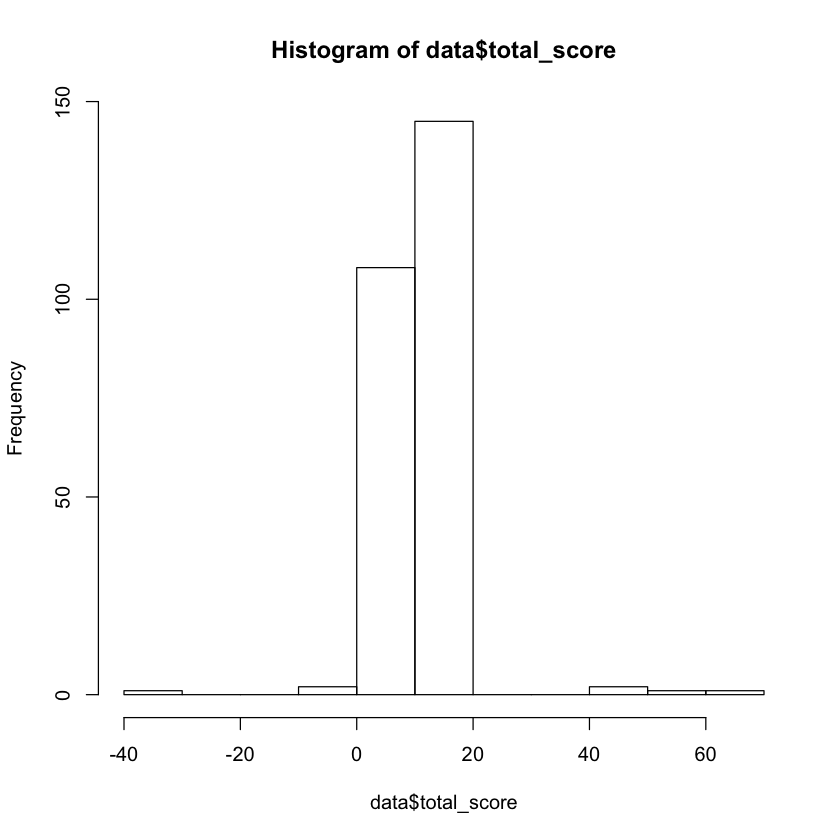

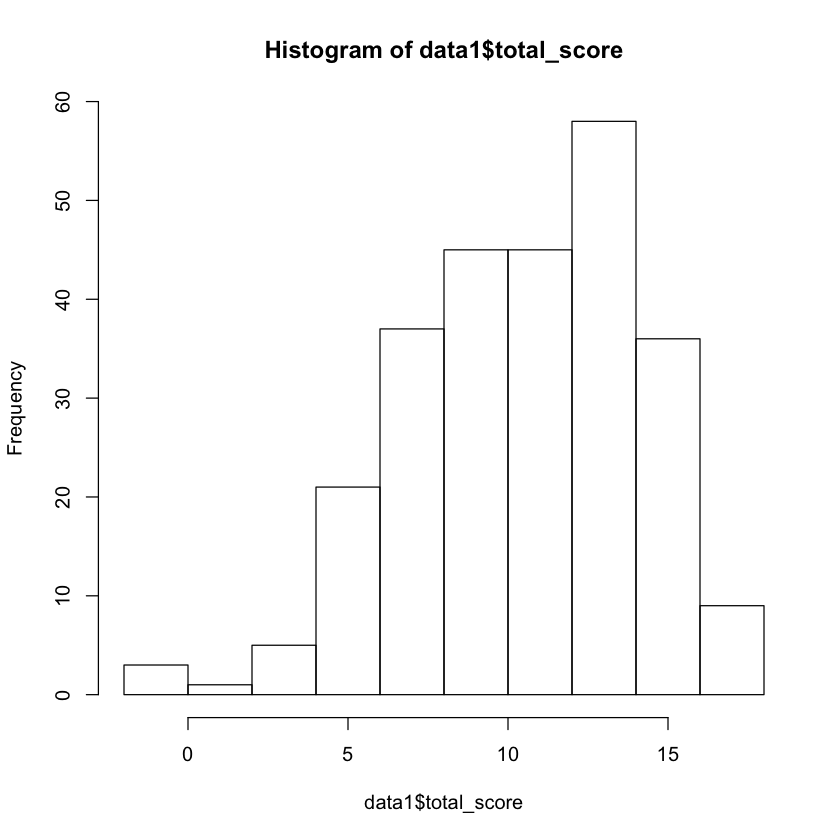

In [106]:
# check normality of total_score now (compared with original one)
par(mrow= c(2,1))
hist(data$total_score)
hist(data1$total_score)

In [76]:
# look at some plots

In [ ]:
# some tests

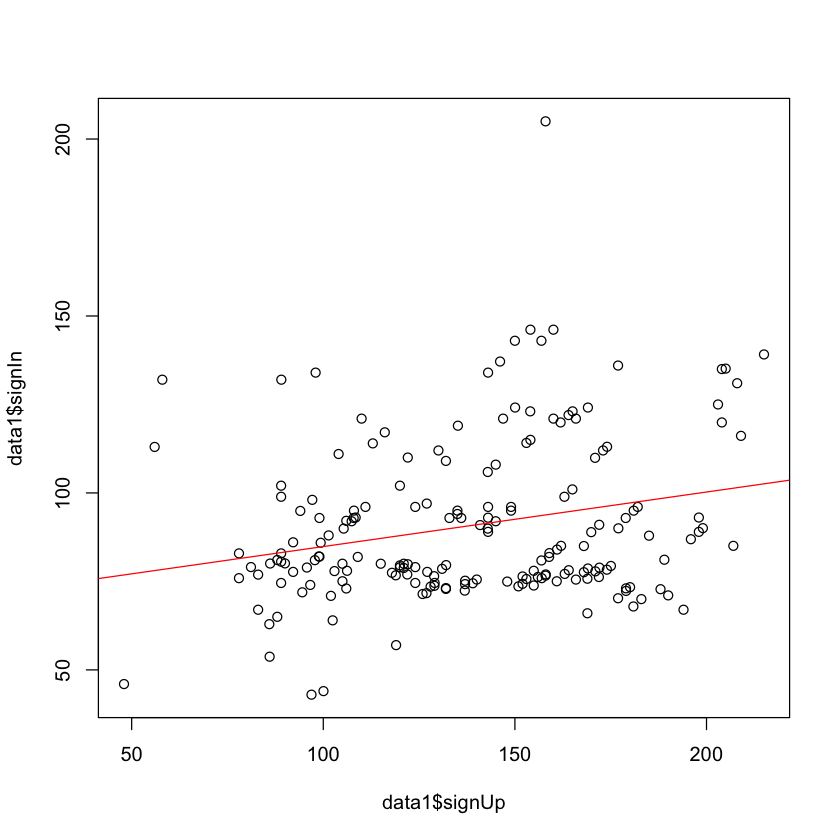

In [80]:
plot(data1$signUp, data1$signIn)
abline(lm(signIn ~signUp, data= data1), col= 'RED')

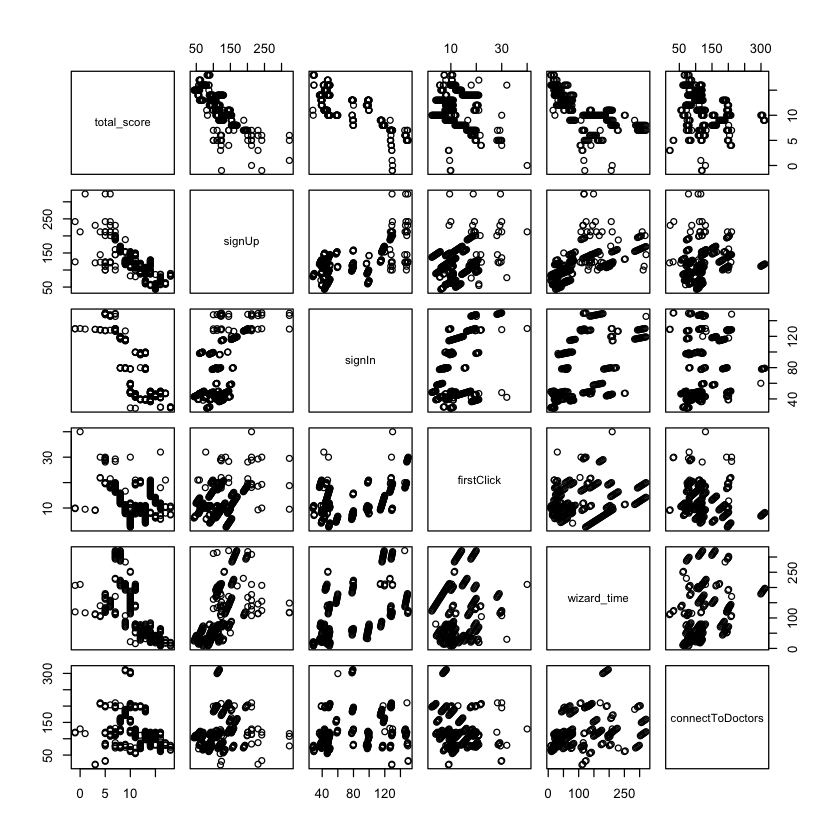

In [109]:
plot(data1[,13:18])

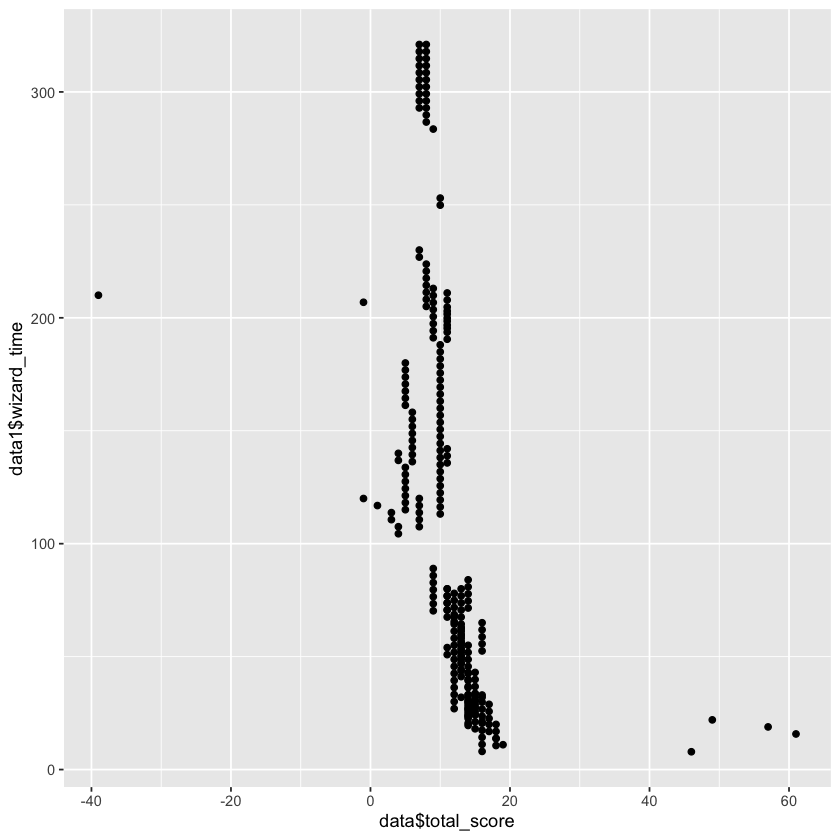

In [110]:
ggplot(data1, mapping = aes(x= data$total_score , y= data1$wizard_time)) + geom_point()
# not useful informaiton because of difference in sacles

In [111]:
data2 <- data1

In [112]:
# normalize
data2[3:18] <- data1 %>% keep(is.numeric) %>% scale()

Warning message in matrix(value, n, p):
“data length [4680] is not a sub-multiple or multiple of the number of columns [16]”

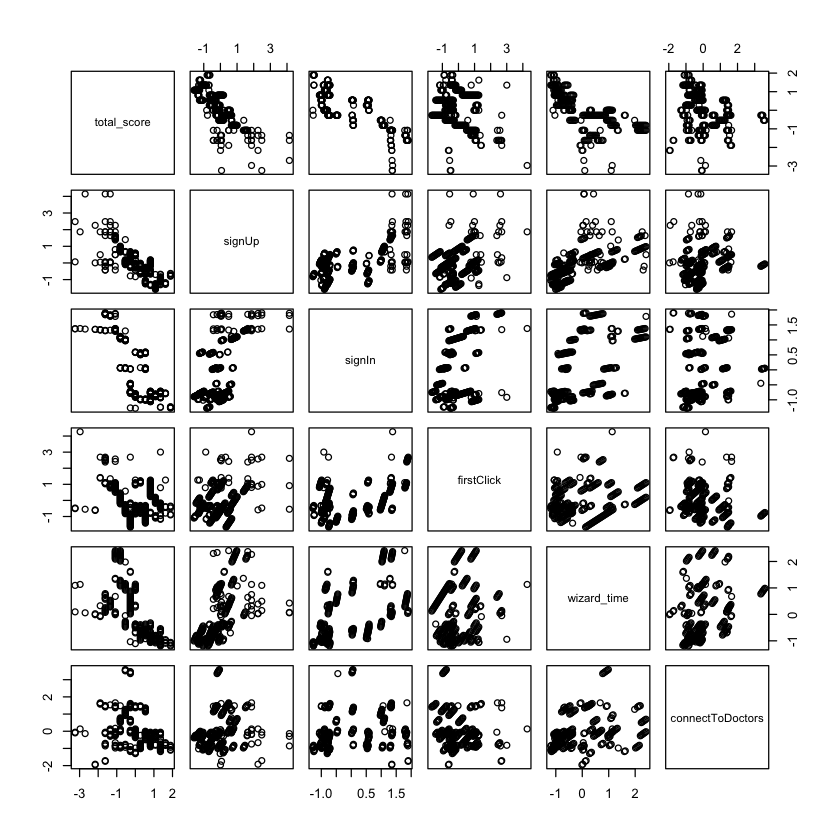

In [113]:
plot(data2[13:18])

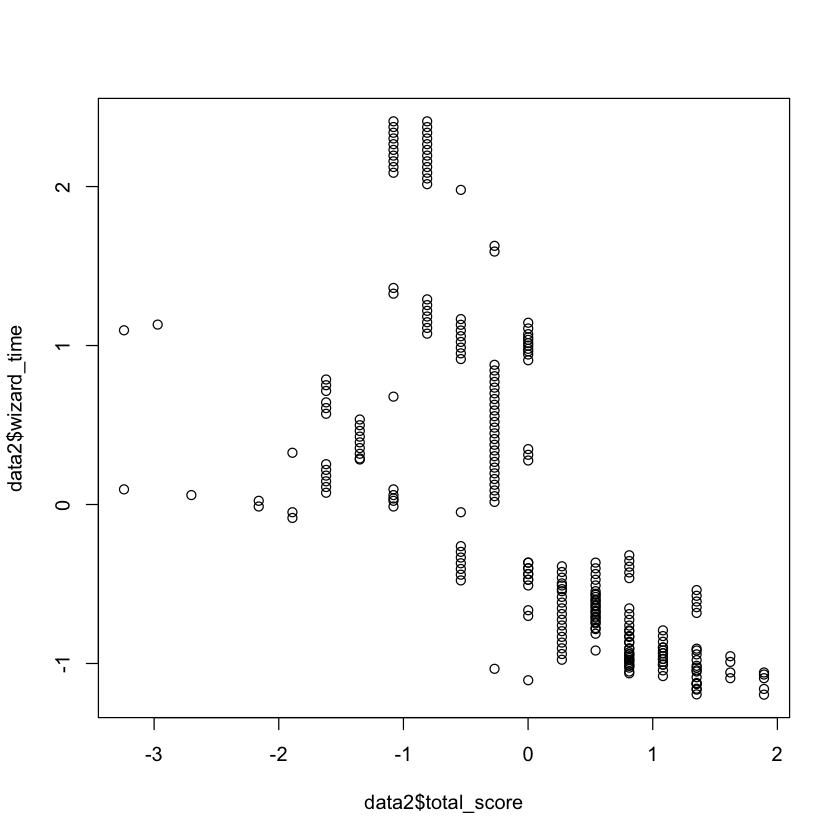

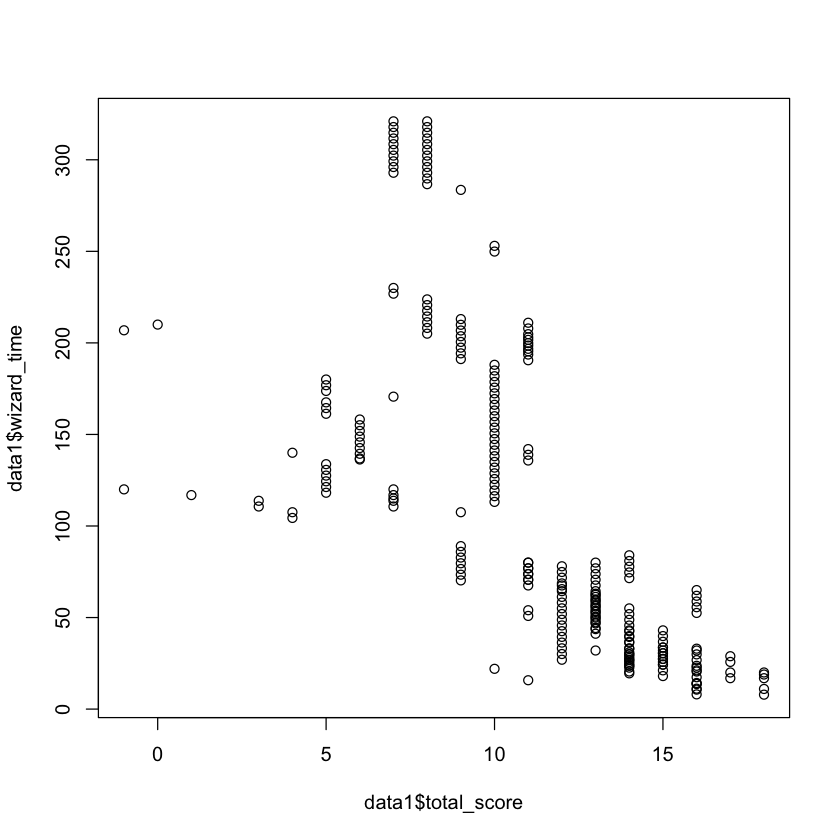

In [115]:
plot(data2$total_score, data2$wizard_time)
plot(data1$total_score, data1$wizard_time)

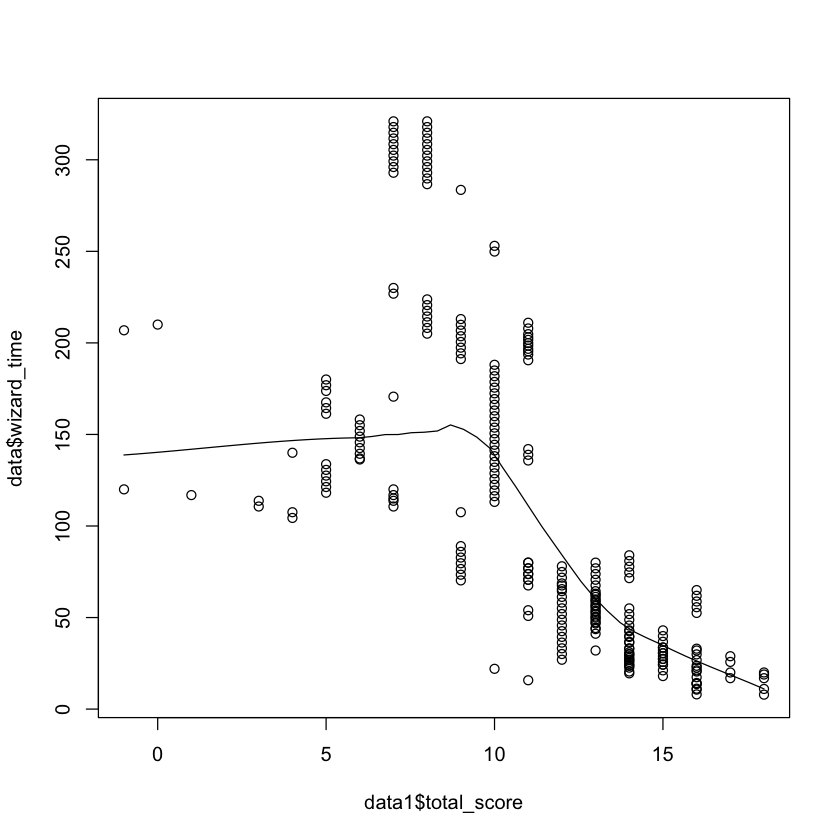

In [116]:
scatter.smooth(data1$total_score, data$wizard_time)

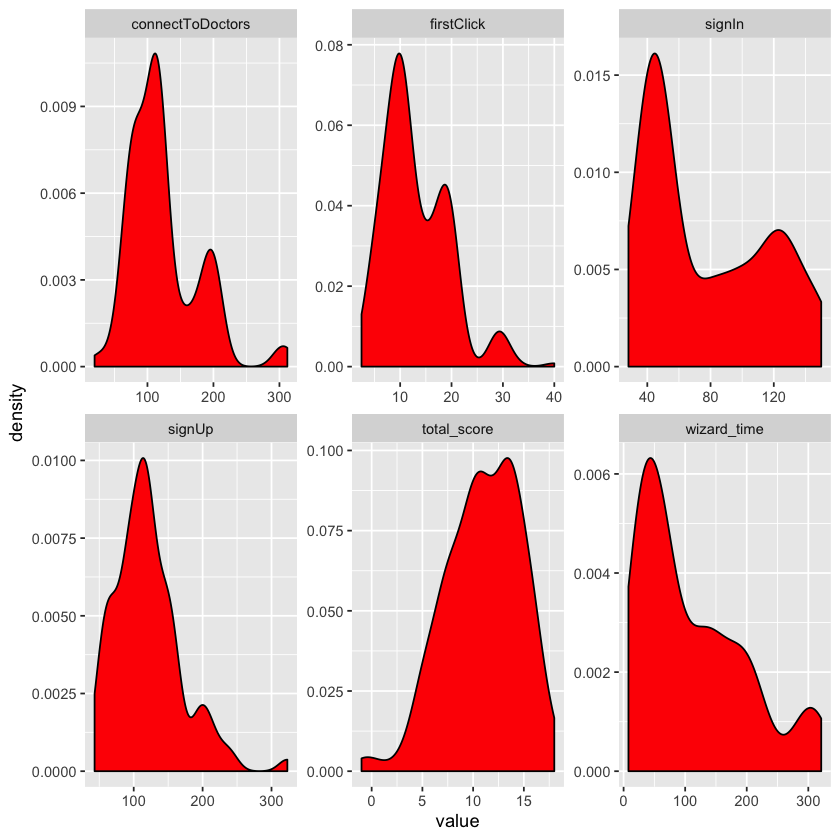

In [124]:
#Using Density Plot To Check If Response Variable Is Close To Normal
data1[, 13:18] %>% keep(is.numeric) %>% gather() %>% ggplot(aes(value))+ facet_wrap(~ key, scales = "free") + geom_density(fill= "red")


In [125]:
#4. What is Correlation Analysis?
cor(data1$total_score, data1$wizard_time) 

[1] -0.6845585

In [143]:
cor(data1[13:18])

,total_score,signUp,signIn,firstClick,wizard_time,connectToDoctors
total_score,1.0000000,-0.7672720,-0.7955739,-0.3532681,-0.6845585,-0.2630832
signUp,-0.7672720,1.0000000,0.6116928,0.3553912,0.5763057,0.1511190
signIn,-0.7955739,0.6116928,1.0000000,0.4394044,0.5393643,0.1438298
firstClick,-0.3532681,0.3553912,0.4394044,1.0000000,0.1917539,-0.1822146
wizard_time,-0.6845585,0.5763057,0.5393643,0.1917539,1.0000000,0.2856836
connectToDoctors,-0.2630832,0.1511190,0.1438298,-0.1822146,0.2856836,1.0000000


In [126]:
#linear models
lm1 <- lm(total_score ~ data1$appointmentScheduling + 
          data1$findMyExercise+ data1$connectToDoctors + 
          data1$wizard_time + data1$firstClick + data1$signIn +
         data1$signUp, data= data1)

In [129]:
print(lm1)


Call:
lm(formula = total_score ~ data1$appointmentScheduling + data1$findMyExercise + 
    data1$connectToDoctors + data1$wizard_time + data1$firstClick + 
    data1$signIn + data1$signUp, data = data1)

Coefficients:
                (Intercept)  data1$appointmentScheduling  
                  20.858525                    -0.018043  
       data1$findMyExercise       data1$connectToDoctors  
                  -0.013835                    -0.005126  
          data1$wizard_time             data1$firstClick  
                  -0.006552                    -0.008163  
               data1$signIn                 data1$signUp  
                  -0.035897                    -0.024530  



In [130]:
summary(lm1)


Call:
lm(formula = total_score ~ data1$appointmentScheduling + data1$findMyExercise + 
    data1$connectToDoctors + data1$wizard_time + data1$firstClick + 
    data1$signIn + data1$signUp, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1174 -0.8139  0.0853  0.9530  2.7960 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 20.858525   0.396710  52.579  < 2e-16 ***
data1$appointmentScheduling -0.018043   0.002407  -7.497 1.11e-12 ***
data1$findMyExercise        -0.013835   0.003187  -4.341 2.05e-05 ***
data1$connectToDoctors      -0.005126   0.001877  -2.731  0.00676 ** 
data1$wizard_time           -0.006552   0.001404  -4.666 4.98e-06 ***
data1$firstClick            -0.008163   0.016698  -0.489  0.62536    
data1$signIn                -0.035897   0.003387 -10.598  < 2e-16 ***
data1$signUp                -0.024530   0.002564  -9.569  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 

In [133]:
lm1$coefficients

(Intercept) data1$appointmentScheduling 
               20.858525238                -0.018043199 
       data1$findMyExercise      data1$connectToDoctors 
               -0.013835229                -0.005125982 
          data1$wizard_time            data1$firstClick 
               -0.006551972                -0.008163325 
               data1$signIn                data1$signUp 
               -0.035897197                -0.024529558

In [135]:
# measures of the goodness of fit of the linear regression model and can also be used for model selection
AIC(lm1)
BIC(lm1)

[1] 939.1918

[1] 971.238

In [ ]:
#7. How to know which regression model is best fit for the data?
R-Squared	Higher the better
Adj R-Squared	Higher the better
F-Statistic	Higher the better
Std. Error	Closer to zero the better
t-statistic	Should be greater 1.96 for p-value to be less than 0.05
AIC	Lower the better
BIC	Lower the better
Mallows cp	Should be close to the number of predictors in model
MAPE (Mean absolute percentage error)	Lower the better
MSE (Mean squared error)	Lower the better
Min_Max Accuracy => mean(min(actual, predicted)/max(actual, predicted))	Higher the better

In [ ]:
#  Predicting Linear Models


In [141]:
# Step 1: Create the training and test data
set.seed(100)
trainRow <- sample(1:nrow(data1) , .8 *nrow(data1))

train <- data1[trainRow, ]
test <- data[-trainRow, ]

In [142]:
dim(train)
dim(test)

[1] 208  20

[1] 52 20

In [148]:
# 2- Fit the model on training data and predict dist on test data
lm <- lm(total_score ~ appointmentScheduling + 
          findMyExercise+ connectToDoctors + 
          wizard_time + firstClick + signIn +
         signUp, data= train) 

predicted <- predict(lm, test)

In [150]:
# Step 3: Review diagnostic measures.
summary(lm)
AIC(lm)


Call:
lm(formula = total_score ~ appointmentScheduling + findMyExercise + 
    connectToDoctors + wizard_time + firstClick + signIn + signUp, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.9798 -0.8521  0.0796  0.8092  2.6378 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           20.693255   0.407354  50.799  < 2e-16 ***
appointmentScheduling -0.014367   0.002632  -5.459 1.41e-07 ***
findMyExercise        -0.011294   0.003154  -3.581  0.00043 ***
connectToDoctors      -0.005370   0.001911  -2.811  0.00544 ** 
wizard_time           -0.008318   0.001481  -5.616 6.49e-08 ***
firstClick            -0.024629   0.016798  -1.466  0.14417    
signIn                -0.034841   0.003472 -10.034  < 2e-16 ***
signUp                -0.024250   0.002563  -9.460  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.333 on 200 degrees of freedom
Multiple R-squared:  0.8691,

[1] 719.7588

In [ ]:
#From the model summary, the model p value and predictor’s p value are less than the significance level.

#So you have a statistically significant model.

# Also, the R-Sq and Adj R-Sq are comparative to the original model built on full data.

# we may want to remove firstclick since it has no impact on the model

In [152]:
# Step 4: Calculate prediction accuracy and error rates
actuals_preds <- cbind(actuals= test$total_score, predicteds= predicted)
cor_accuracy <- cor(actuals_preds) #62%

In [153]:
cor_accuracy

,actuals,predicteds
actuals,1.0000000,0.6240835
predicteds,0.6240835,1.0000000


In [154]:
head(actuals_preds)

,actuals,predicteds
3,-1,5.912683
6,3,8.942359
9,4,7.295780
17,5,6.233465
21,5,5.753622
23,5,6.809954


In [156]:
#Now lets calculate the Min Max accuracy and MAPE:

mean_max<- mean(apply(actuals_preds, 1, min)/ apply(actuals_preds, 1, max))
mean_max

[1] 0.8294612

In [ ]:
# k-fold
# to make sure that we care covering all varition in train and test sampling (e.g are we sure that we have mode roads)



In [167]:
glimpse(data1)

Observations: 260
Variables: 20
$ Users                 <fct> u78, u174, u32, u143, u72, u79, u68, u22, u111,…
$ Product               <fct> Advocate, Beyond, Coach, Beyond, Advocate, Advo…
$ frequent_use          <int> 2, 3, 5, 2, 3, 2, 3, 3, 2, 2, 4, 1, 2, 2, 3, 2,…
$ complex               <int> -2, -1, -2, -2, -1, -1, -3, -3, -2, -2, -3, -3,…
$ easy_to_use           <dbl> 4, 0, 0, 0, 3, 3, 3, 4, 3, 4, 3, 4, 4, 4, 1, 4,…
$ need_help             <int> -2, 0, -2, -2, -2, -3, -1, -2, -4, -1, -3, -3, …
$ well.integrated       <dbl> 3, 0, 0, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,…
$ inconsistent          <dbl> -5, 0, -2, -2, -5, -3, -3, -3, -2, -2, -3, -3, …
$ learnable             <dbl> 1, 0, 0, 3, 3, 1, 3, 4, 5, 4, 4, 4, 3, 3, 4, 4,…
$ cumbersome            <int> -2, 0, 0, -2, -3, -1, -3, -3, -2, -1, -2, -2, -…
$ confident             <dbl> 3, 0, 0, 3, 3, 2, 3, 4, 3, 4, 5, 5, 3, 3, 4, 4,…
$ need_knowledge        <dbl> -2, -3, 0, -2, -2, -1, -2, -3, -2, -5, -3, -1, …
$ total_score       

In [169]:
install.packages("frequency")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [171]:
library("frequency")

Loading required package: rmarkdown
Loading required package: knitr
Loading required package: DT


In [173]:
freq(data1)

Building tables


  |======================================================================| 100%


,,Users,label,Freq,Percent,Valid Percent,Cumulative Percent
2,Valid,u1,,1,0.4,0.4,0.4
113,,u2,,1,0.4,0.4,0.8
185,,u3,,1,0.4,0.4,1.2
196,,u4,,1,0.4,0.4,1.5
207,,u5,,1,0.4,0.4,1.9
218,,u6,,1,0.4,0.4,2.3
229,,u7,,1,0.4,0.4,2.7
240,,u8,,1,0.4,0.4,3.1
251,,u9,,1,0.4,0.4,3.5
3,,u10,,1,0.4,0.4,3.8


In [174]:
load.libraries <- c('data.table', 'testthat', 'gridExtra', 'corrplot', 'GGally', 'ggplot2', 'e1071', 'dplyr')
install.lib <- load.libraries[!load.libraries %in% installed.packages()]
for(libs in install.lib) install.packages(libs, dependences = TRUE)
sapply(load.libraries, require, character = TRUE)

Warning message in install.packages(libs, dependences = TRUE):
“installation of package ‘e1071’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose

Loading required package: testthat

Attaching package: ‘testthat’

The following object is masked from ‘package:psych’:

    describe

The following objects are masked from ‘package:magrittr’:

    equals, is_less_than, not

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null

Loading required package: gridExtra

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: corrplot
corrplot 0.84 loaded
Loading required package: GG

data.table   testthat  gridExtra   corrplot     GGally    ggplot2      e1071 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE      FALSE 
     dplyr 
      TRUE

In [178]:
colSums(sapply(data1, is.na))

Users               Product          frequent_use 
                    0                     0                     0 
              complex           easy_to_use             need_help 
                    0                     0                     0 
      well.integrated          inconsistent             learnable 
                    0                     0                     0 
           cumbersome             confident        need_knowledge 
                    0                     0                     0 
          total_score                signUp                signIn 
                    0                     0                     0 
           firstClick           wizard_time      connectToDoctors 
                    0                     0                     0 
       findMyExercise appointmentScheduling 
                    0                     0

In [179]:
head(data1)

Users,Product,frequent_use,complex,easy_to_use,need_help,well.integrated,inconsistent,learnable,cumbersome,confident,need_knowledge,total_score,signUp,signIn,firstClick,wizard_time,connectToDoctors,findMyExercise,appointmentScheduling
u78,Advocate,2,-2,4,-2,3,-5,1,-2,3,-2,0,212,130.00,40.00,210.00,130.0,201.0,301.0
u174,Beyond,3,-1,0,0,0,0,0,0,0,-3,-1,242,129.76,10.00,206.88,120.0,120.0,291.6
u32,Coach,5,-2,0,-2,0,-2,0,0,0,0,-1,124,129.52,9.76,120.00,117.9,118.2,282.2
u143,Beyond,2,-2,0,-2,3,-2,3,-2,3,-2,1,323,129.28,9.52,116.88,115.8,116.4,272.8
u72,Advocate,3,-1,3,-2,4,-5,3,-3,3,-2,3,231,129.04,9.28,113.76,22.0,114.6,263.4
u79,Advocate,2,-1,3,-3,4,-3,1,-1,2,-1,3,121,128.80,9.04,110.64,19.9,120.0,120.0


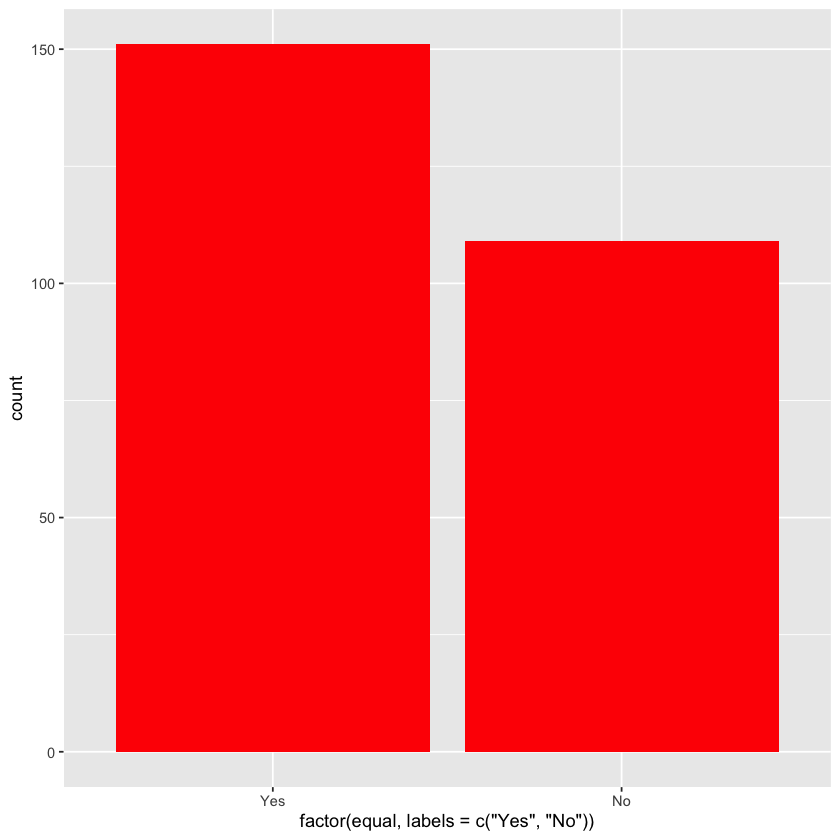

In [194]:
attach(data1)
par(mfrow = c(3,3))
data1 %>% select(learnable, confident) %>% mutate(equal= as.integer(learnable != confident))%>% ggplot(aes(x= factor(equal, labels = c("Yes", "No")))) + geom_bar( fill="red")





In [214]:
install.packages("cowplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [215]:
# for having grid of plot (when par mfrow does not work)
library(cowplot)


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggpubr’:

    get_legend



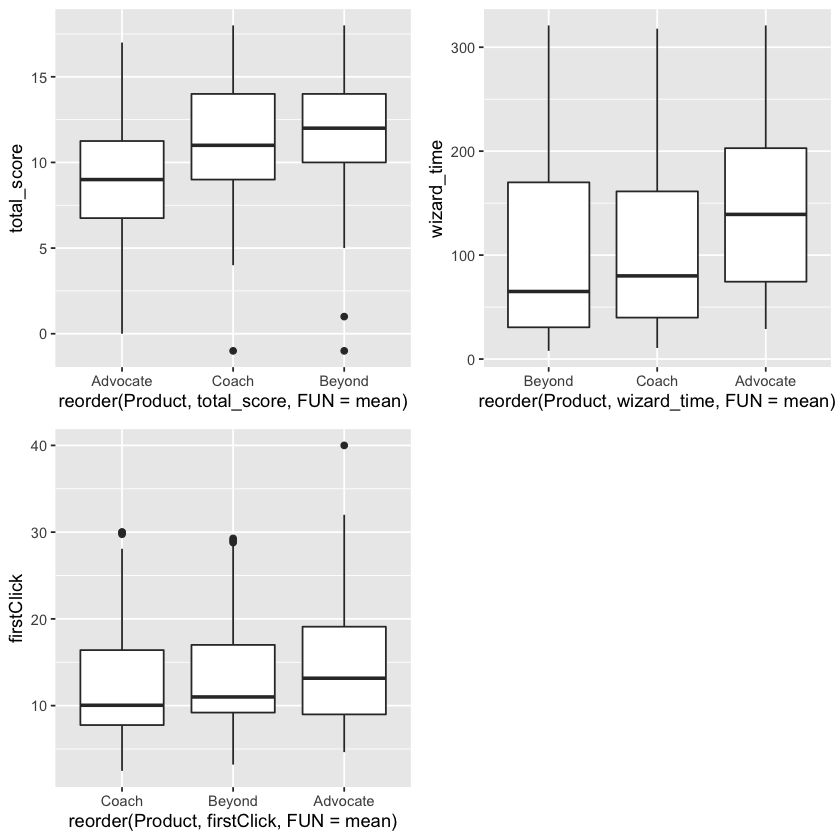

In [218]:
a<-ggplot(data= data1) + geom_boxplot(mapping = aes ( x= reorder(Product, total_score, FUN= mean), y= total_score))
b<- ggplot(data= data1) + geom_boxplot(mapping = aes ( x= reorder(Product, wizard_time, FUN= mean), y= wizard_time))
c<- ggplot(data= data1) + geom_boxplot(mapping = aes ( x= reorder(Product, firstClick, FUN= mean), y= firstClick))

plot_grid(a, b, c)

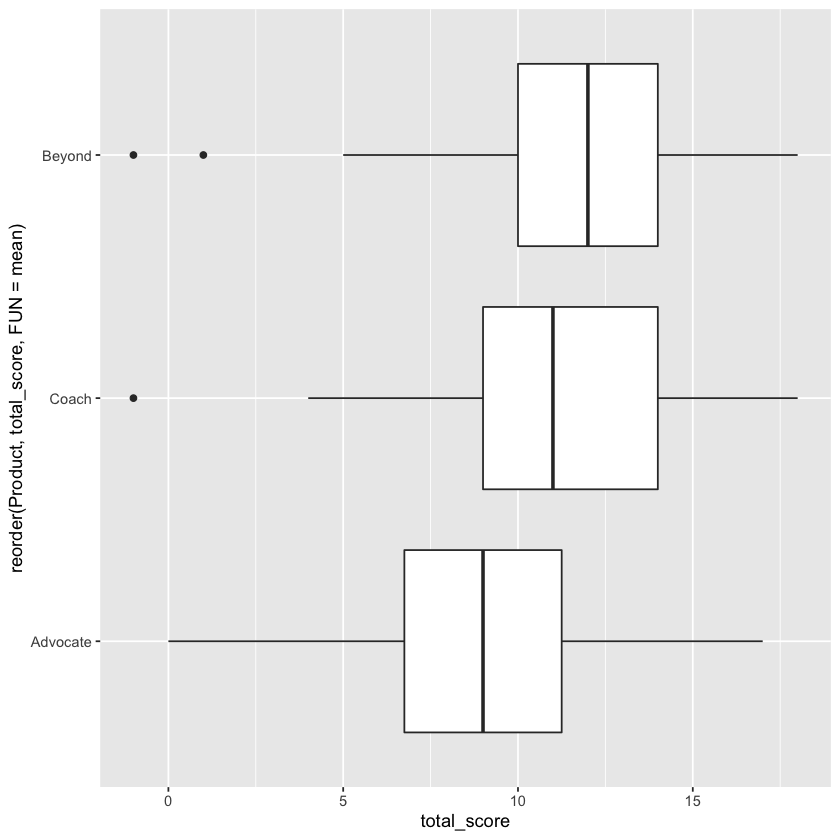

In [221]:
# in a case we like to flip a plot
a<-ggplot(data= data1) + geom_boxplot(mapping = aes ( x= reorder(Product, total_score, FUN= mean), y= total_score))+
coord_flip()
a

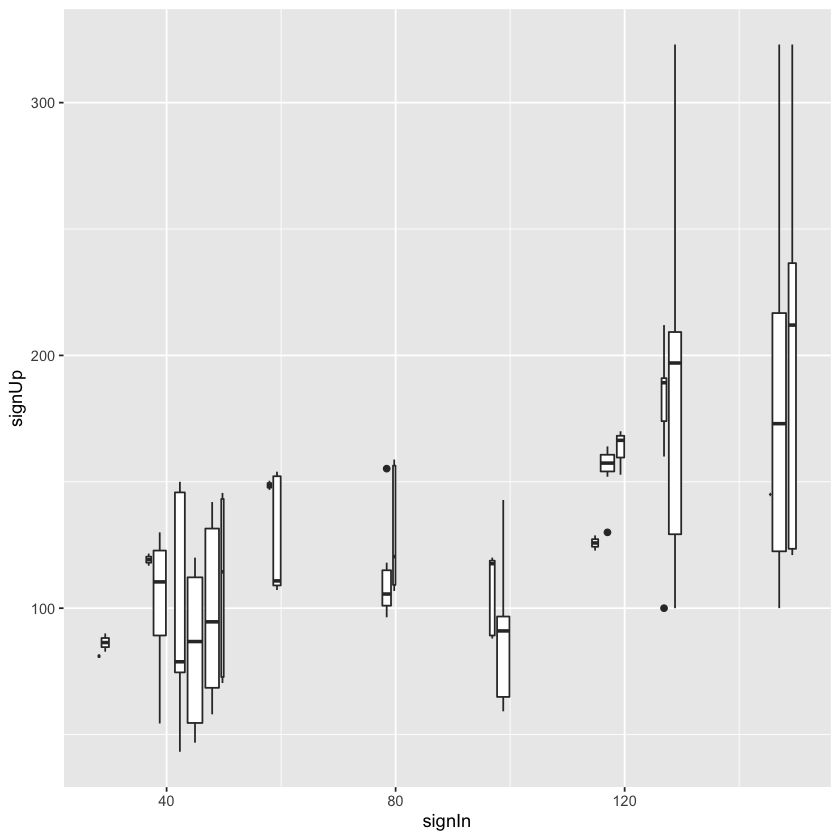

In [231]:
#Another option is to bin one continuous variable so it acts like a categorical variable.
#Then you can use one of the techniques for visualising the combination of a categorical 
#and a continuous variable that you learned about. For example, you could bin carat and then
#for each group, display a boxplot

a<- ggplot(data= data1, mapping= aes(x= signIn, y=signUp)) + geom_boxplot(mapping= aes(group= cut_width(signIn, 3)))
a

In [204]:
# again look at the correlations
cor(data1[13:18])

,total_score,signUp,signIn,firstClick,wizard_time,connectToDoctors
total_score,1.0000000,-0.7672720,-0.7955739,-0.3532681,-0.6845585,-0.2630832
signUp,-0.7672720,1.0000000,0.6116928,0.3553912,0.5763057,0.1511190
signIn,-0.7955739,0.6116928,1.0000000,0.4394044,0.5393643,0.1438298
firstClick,-0.3532681,0.3553912,0.4394044,1.0000000,0.1917539,-0.1822146
wizard_time,-0.6845585,0.5763057,0.5393643,0.1917539,1.0000000,0.2856836
connectToDoctors,-0.2630832,0.1511190,0.1438298,-0.1822146,0.2856836,1.0000000


In [235]:
head(filter(data, Product=="Advocate"), 3)

Users,Product,frequent_use,complex,easy_to_use,need_help,well.integrated,inconsistent,learnable,cumbersome,confident,need_knowledge,total_score,signUp,signIn,firstClick,wizard_time,connectToDoctors,findMyExercise,appointmentScheduling
u78,Advocate,2,-2,4,-2,3,-44,1,-2,3,-2,-39,212,130.00,40.00,210.00,130.0,201.0,301.0
u72,Advocate,3,-1,3,-2,4,-5,3,-3,3,-2,3,231,129.04,9.28,113.76,22.0,114.6,263.4
u79,Advocate,2,-1,3,-3,4,-3,1,-1,2,-1,3,121,128.80,9.04,110.64,19.9,120.0,120.0


In [237]:
filter(data, Product=="Advocate") %>% unique %>% nrow

[1] 52

In [241]:
# get summary of a variable based on group of other variables:
df1_sum <-  group_by(data1, Product)%>% 
summarise(mean= mean(total_score))
df1_sum

Product,mean
Advocate,9.00000
Beyond,11.73427
Coach,10.96923


In [255]:
filter(data1, Product== "Advocate" & firstClick <60) %>% mutate(score= as.integer(signUp >70, levels= c("Yes", "No"))) %>% group_by(score) %>% summarise(mean= mean(total_score)) 


score,mean
0,16.00
1,8.72


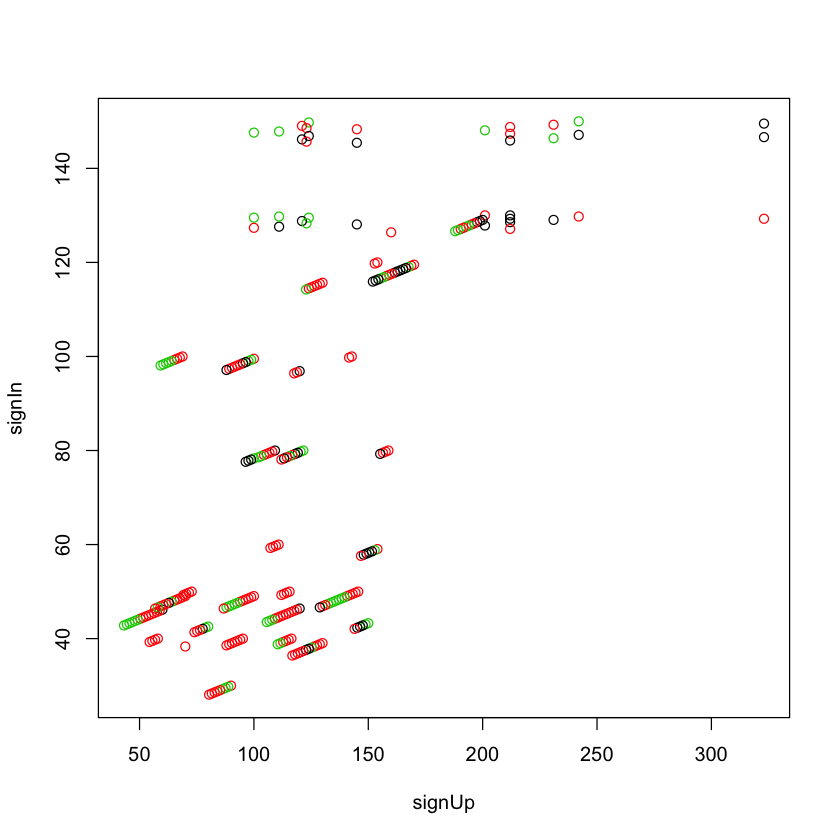

In [261]:
with(data1, plot(signUp, signIn, col=Product))

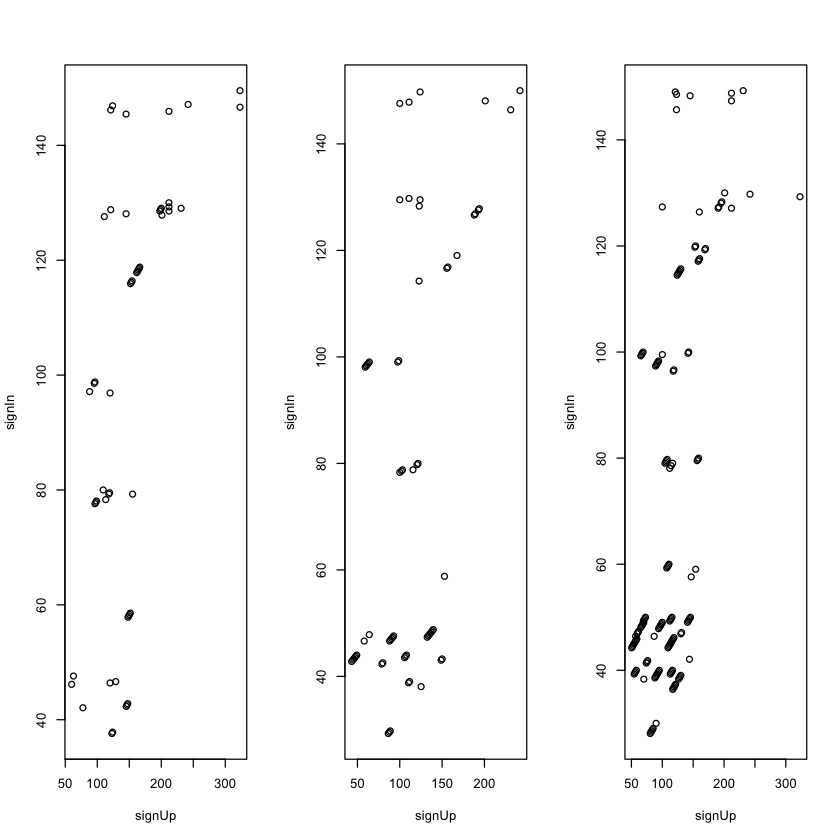

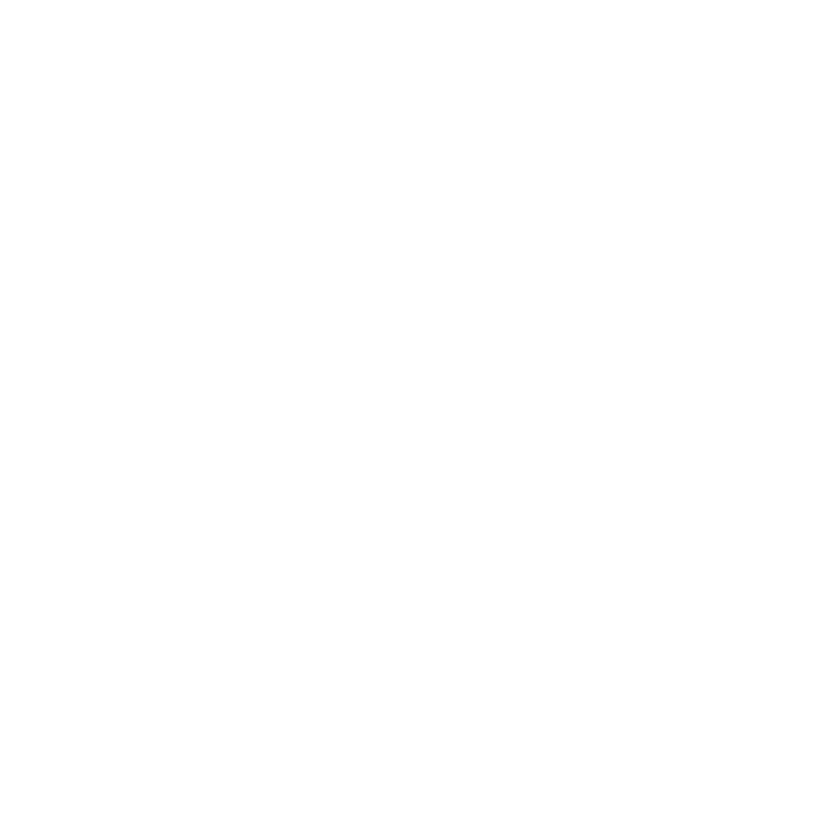

In [271]:
# splited scatter plot
par(mfrow = c(1,3))
a<- with(subset(data1, Product== "Advocate"), plot(signUp, signIn))
b<- with(subset(data1, Product== "Coach"), plot(signUp, signIn))
c<- with(subset(data1, Product== "Beyond"), plot(signUp, signIn))

plot_grid(a, b, c)

In [99]:
#function for handeling outliers
outlierKD <- function(data, variable) {
     var_name <- eval(substitute(variable),eval(data)) # return list of values in varaible
     na1 <- sum(is.na(var_name))
     m1 <- mean(var_name, na.rm = T)
     
     par(mfrow=c(2, 2), oma=c(0,0,3,0))
     boxplot(var_name, main="With outliers")
     hist(var_name, main="With outliers", xlab=NA, ylab=NA)
    
    
     outlier <- boxplot.stats(var_name)$out
     mo <- mean(outlier)
     var_name <- ifelse(var_name %in% outlier, NA, var_name)
     boxplot(var_name, main="Without outliers")
     hist(var_name, main="Without outliers", xlab=NA, ylab=NA)
     title("Outlier Check", outer=TRUE)
    
     na2 <- sum(is.na(var_name))
     cat("Outliers identified:", na2 - na1, "\n") # Use cat to print information to an end-user from a function
     cat("Propotion (%) of outliers:", round((na2 - na1) / sum(!is.na(var_name))*100, 1), "\n")
     cat("Mean of the outliers:", round(mo, 2), "\n")
     m2 <- mean(var_name, na.rm = T)
     cat("Mean without removing outliers:", round(m1, 2), "\n")
     cat("Mean if we remove outliers:", round(m2, 2), "\n")
    
    
    response <- readline(prompt="Do you want to remove outliers and to replace with NA? [yes/no]: ")
     if(response == "y" | response == "yes"){
          data[as.character(substitute(variable))] <- invisible(var_name)
          assign(as.character(as.list(match.call())$data), data, envir = .GlobalEnv)
          cat("Outliers successfully removed", "\n")
          return(invisible(data))
     } else{
          cat("Nothing changed", "\n")
          return(invisible(var_name))
     }
    
}





Do you want to remove outliers and to replace with NA? [yes/no]: y
Outliers identified: 0 
Propotion (%) of outliers: 0 
Mean of the outliers: NaN 
Mean without removing outliers: 82.6 
Mean if we remove outliers: 82.6 
Outliers successfully removed 


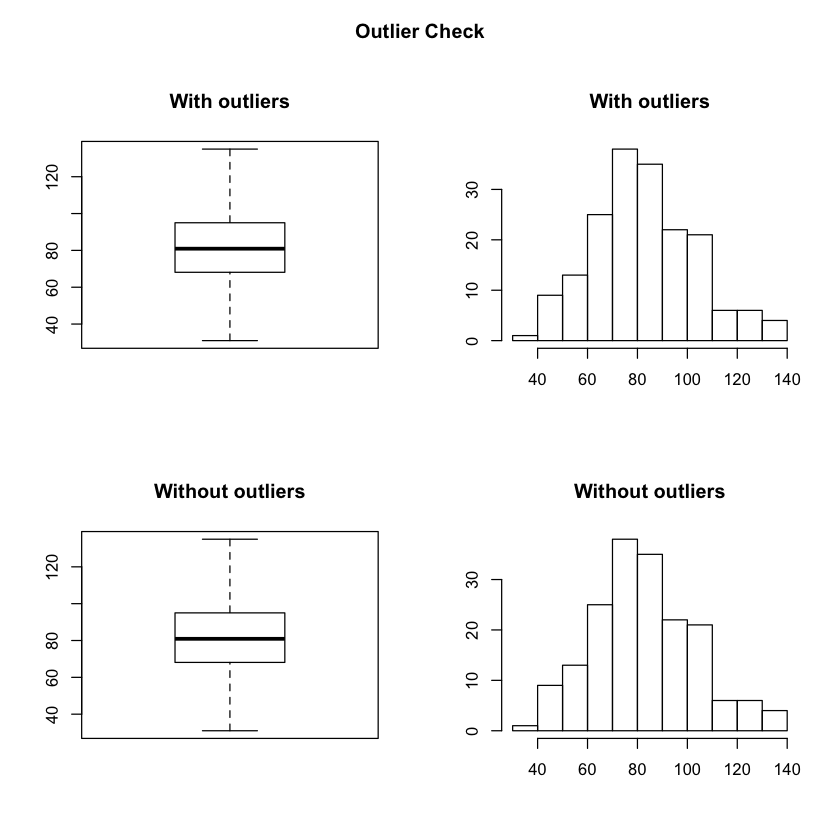

In [100]:
outlierKD(data1, wizard_time)


In [ ]:
# 4 ways to subset data in r e.g data
#1- select first 10 rows, and col number 6, 11,12,13, 17......: data[c(1:10), c(6, 1:13, 17)]
#2- use select and filter function, let say we want data that variable city= chicago........: city_chi <- select (filter (data, city== 'chicago'))
#3-which....: data[which(data$city== 'chicago')]
#4- subset function

In [102]:
apply(data[13:17], 2, function(x) is.vector(x))

total_score      signUp      signIn  firstClick wizard_time 
       TRUE        TRUE        TRUE        TRUE        TRUE

In [103]:
apply(data[2:17], 2, function(x) is.vector(x))

Product    frequent_use         complex     easy_to_use       need_help 
           TRUE            TRUE            TRUE            TRUE            TRUE 
well.integrated    inconsistent       learnable      cumbersome       confident 
           TRUE            TRUE            TRUE            TRUE            TRUE 
 need_knowledge     total_score          signUp          signIn      firstClick 
           TRUE            TRUE            TRUE            TRUE            TRUE 
    wizard_time 
           TRUE

In [107]:
apply(data[13:17], 2, function(x) mean(x))

total_score      signUp      signIn  firstClick wizard_time 
   11.57219   138.29588    90.76369    24.18316    85.75668

In [108]:
apply(data[13:17], 2, mean)

total_score      signUp      signIn  firstClick wizard_time 
   11.57219   138.29588    90.76369    24.18316    85.75668

In [110]:
head(apply(data[13:17], 2, function(x) ifelse(x>300, NA, x)))

total_score,signUp,signIn,firstClick,wizard_time
19,94.52,71.92,2.00,101.00
12,78.00,75.92,5.00,61.92
11,96.60,74.00,6.00,53.64
15,83.00,67.00,7.00,52.00
7,105.00,75.05,33.00,104.13
13,121.92,76.96,7.92,42.20


In [115]:
apply(data1, 2, function(x) length(x[x>100]))

Users               Product          frequent_use 
                  187                   187                   183 
              complex           easy_to_use             need_help 
                    0                     4                     0 
      well.integrated          inconsistent             learnable 
                    2                     0                     1 
           cumbersome             confident        need_knowledge 
                    0                     2                     0 
          total_score                signUp                signIn 
                    0                   153                    46 
           firstClick           wizard_time      connectToDoctors 
                  172                    44                    87 
       findMyExercise appointmentScheduling 
                   92                    70